Importing libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D

Displaying classes

In [2]:
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

### Train_dataset used was :
train_dataset = train.flow_from_directory('C:/Users/Aditi/Desktop/newtrain',   
                                          batch_size = 32,
                                          target_size = (200,200),
                                          class_mode = 'categorical') 
### output : 
Found 28709 images belonging to 7 classes.
                                          
### Validation_dataset used was :
validation_dataset = train.flow_from_directory('C:/Users/Aditi/Desktop/newvalidation',    
                                                batch_size = 32,
                                                target_size = (200,200),           
                                                class_mode = 'categorical')
### output : 
Found 7178 images belonging to 7 classes

Model

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))    
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))                             
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))               
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))                              
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))                  
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))                            
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))                  
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

Summarizing the model

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 21, 21, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       7

Loading weight

In [5]:
model.load_weights('C:/Users/Aditi/Desktop/weights.hd5')

Predicting model

Sad


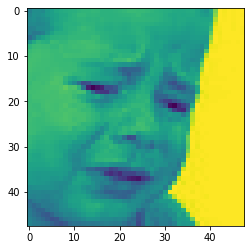

In [7]:
img = cv2.imread('C:/Users/Aditi/Desktop/newvalidation/sad/PrivateTest_22191391.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img1 = img.reshape((1,48,48,1))

print(classes[np.argmax(model.predict(img1))])
plt.imshow(img)


# Accuary of Model : 80%

# This is code I used to train the model to get weights:
COMPILING MODEL:
optimizer = optimizers.Adam(learning_rate= 0.001) 
model.compile(optimizer= optimizer,
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

MODEL FIT:
model_fit = model.fit(train_dataset,
                     batch_size = 64, 
                     epochs = 50,
                     validation_data = validation_dataset)

# Some random path_to_images 

'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_11724564.jpg'
'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_29338334.jpg'
'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_34273172.jpg'
'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_46022583.jpg'
'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_70890780.jpg'

'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_7969511.jpg'
'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_7622844.jpg'
'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_13278552.jpg'
'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_20588149.jpg'
'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_22203098.jpg'

'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_166793.jpg'
'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_2333732.jpg'
'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_6511300.jpg'
'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_8576699.jpg'
'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_10306709.jpg'

'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_647018.jpg'
'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_2764941.jpg'
'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_3333329.jpg'
'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_4014756.jpg'
'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_4315069.jpg'

'C:/Users/Aditi/Desktop/newvalidation/sad/PrivateTest_4412719.jpg'
'C:/Users/Aditi/Desktop/newvalidation/sad/PrivateTest_22191391.jpg'

'C:/Users/Aditi/Desktop/newvalidation/disgust/PrivateTest_28980932.jpg'

'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_139065.jpg'
'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_104142.jpg'
'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_6116699.jpg'
'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_6587334.jpg
'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_10072988.jpg'

'C:/Users/Aditi/Desktop/newvalidation/angry/PrivateTest_14740105.jpg'
'C:/Users/Aditi/Desktop/newvalidation/neutral/PrivateTest_687498.jpg'
'C:/Users/Aditi/Desktop/newvalidation/disgust/PrivateTest_62447860.jpg'
'C:/Users/Aditi/Desktop/newvalidation/fear/PrivateTest_2632530.jpg'
'C:/Users/Aditi/Desktop/newvalidation/happy/PrivateTest_2911075.jpg'
'C:/Users/Aditi/Desktop/newvalidation/sad/PrivateTest_34581536.jpg'
'C:/Users/Aditi/Desktop/newvalidation/surprise/PrivateTest_1338609.jpg'